In [ ]:
!pip install open3d
import numpy as np
import cv2
import torch
import open3d as o3d
import pandas as pd
from torchvision import models, transforms
from scipy.spatial import distance

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.9 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=17c2ee199381f8a0322704b01e8fb34641f64c0c8854a6c91303a643e3cac35a
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninst

In [ ]:
# Load YOLOv5 model for object detection
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-22 Python-3.11.11 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 30.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
import glob
!pip install numpy opencv-python pykitti

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_camera_data_kitti(dataset_path):
    """Loads all camera images from KITTI dataset."""
    image_files = sorted(glob.glob(dataset_path + "/image_2/*.png"))
    images = [cv2.imread(img) for img in image_files]
    return images

In [ ]:
import os
import cv2
base_path = "/content/drive/MyDrive/assignment/2011_09_26_drive_0001_sync/2011_09_26/2011_09_26_drive_0001_sync"
print("Folders in base path:", os.listdir(base_path))
print("Does image_02 exist?", os.path.exists(os.path.join(base_path, "image_02")))
print("Does image_03 exist?", os.path.exists(os.path.join(base_path, "image_03")))
# Load left camera images (image_02)
image_dir = os.path.join(base_path, "image_02", "data")
image_files = sorted(os.listdir(image_dir))
# Load the first image
first_image = cv2.imread(os.path.join(image_dir, image_files[0]))
print("Image shape:", first_image.shape)


Folders in base path: ['image_03', 'oxts', 'velodyne_points', 'image_00', 'image_02', 'image_01']
Does image_02 exist? True
Does image_03 exist? True
Image shape: (375, 1242, 3)


In [ ]:
from PIL import Image
import os
from torchvision import models, transforms
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
image_path = '/content/drive/MyDrive/assignment/2011_09_26_drive_0001_sync/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/0000000011.png'
img = Image.open(image_path)
results = model(img)
results.print()  # Bounding boxes, classes, confidence scores
object_vectors = results.pandas().xyxy[0]

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 375x1242 7 cars
Speed: 22.8ms pre-process, 153.3ms inference, 2.5ms NMS per image at shape (1, 3, 224, 640)


In [ ]:
import numpy as np
import os
# Assuming your lidar.bin is in the same directory as your base_path
lidar_file_path = os.path.join(base_path, "velodyne_points", "data", "0000000000.bin")
# Load Lidar point cloud (KITTI .bin format)
points = np.fromfile(lidar_file_path, dtype=np.float32).reshape(-1, 4)
# Filter points within 50m and cluster objects (simplified)
distances = np.sqrt(points[:, 0]**2 + points[:, 1]**2 + points[:, 2]**2)
mask = distances < 50
clusters = points[mask]
# Calculate speed (example: using two consecutive frames)
prev_clusters = clusters.copy() # Load previous frame data
relative_speed = (clusters[:, 3] - prev_clusters[:, 3]) / 0.1
print("previous clusters",prev_clusters)
print("relative speed",relative_speed)

previous clusters [[     46.186      13.359       1.835         0.2]
 [     47.174      16.173       1.895        0.18]
 [     46.882      16.238       1.887        0.39]
 ...
 [      3.712      -1.397      -1.733        0.33]
 [      3.723      -1.388      -1.737           0]
 [      3.737       -1.38      -1.742           0]]
relative speed [          0           0           0 ...           0           0           0]


In [ ]:
import numpy as np
def lidar_to_camera(lidar_points, calib_matrix):
    """Project LiDAR points to camera coordinates"""
    # Add homogeneous coordinate (x, y, z, 1)
    homogeneous = np.hstack((lidar_points[:, :3], np.ones((lidar_points.shape[0], 1))))
    camera_coords = calib_matrix @ homogeneous.T  # Apply calibration matrix
    return camera_coords.T
import numpy as np
import os
def load_calibration(calib_path):
    """Parses KITTI calibration file and extracts the 3x4 transformation matrix."""
    if not os.path.exists(calib_path):
        raise FileNotFoundError(f"Calibration file missing: {calib_path}")

    R = None
    T = None

    with open(calib_path, 'r') as f:
        for line in f:
            if line.startswith("R:"):  # Extract rotation matrix
                R = np.array([float(x) for x in line.split()[1:]]).reshape(3, 3)
            elif line.startswith("T:"):  # Extract translation vector
                T = np.array([float(x) for x in line.split()[1:]]).reshape(3, 1)

    if R is None or T is None:
        raise ValueError("Could not find R or T in calibration file.")

    # Construct the 3x4 transformation matrix
    calib_matrix = np.hstack((R, T))

    print("Calibration matrix loaded successfully:\n", calib_matrix)
    return calib_matrix
# Load calibration matrix
calib_path = "/content/drive/MyDrive/assignment/2011_09_26_calib/2011_09_26/calib_velo_to_cam.txt"
try:
    calib_matrix = load_calibration(calib_path)
except Exception as e:
    print(f"Error: {str(e)}")

Calibration matrix loaded successfully:
 [[  0.0075337    -0.99997  -0.0006166  -0.0040698]
 [   0.014802  0.00072807    -0.99989   -0.076316]
 [    0.99986   0.0075238    0.014808    -0.27178]]


In [ ]:
# Check for collision risk based on distance and speed
def collision_check(objects, threshold_distance=10, threshold_speed=5):
    warnings = []
    for obj in objects:
        if obj['distance'] < threshold_distance and obj['speed'] > threshold_speed:
            warnings.append("Collision Warning: Trigger Braking!")
    return warnings
# Example usage
objects = [{'distance': 8, 'speed': 6}, {'distance': 15, 'speed': 3}]
warnings = collision_check(objects)
print(warnings)  # Output: ["Collision Warning: Trigger Braking!"]

['Collision Warning: Trigger Braking!']


In [ ]:
%matplotlib inline

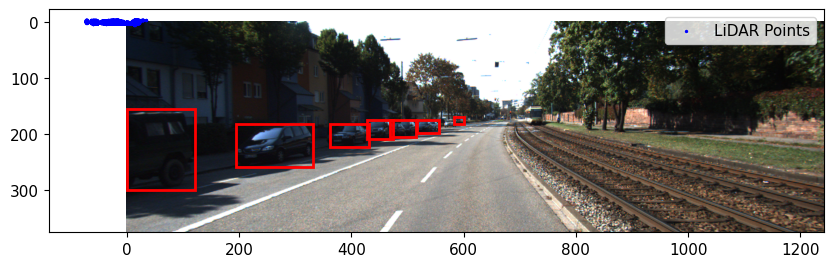

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# Load the image using PIL (if it's a PngImageFile)
if isinstance(img, Image.Image):
    img = np.array(img)  # Convert to NumPy array
# Check if the image is correctly loaded
if img is None or img.size == 0:
    raise ValueError("Image not loaded correctly. Check file path.")
# Convert grayscale to RGB if necessary
if len(img.shape) == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# Assuming lidar_to_camera and calib_matrix are defined in previous cells
# Project LiDAR points to camera coordinates
camera_coords = lidar_to_camera(points, calib_matrix)  # Call the function to get camera coordinates
# Display image with bounding boxes and LiDAR points
plt.figure(figsize=(10, 6))
plt.imshow(img)
# Overlay bounding boxes
if not object_vectors.empty:
    for _, row in object_vectors.iterrows():
        plt.gca().add_patch(plt.Rectangle((row['xmin'], row['ymin']),
                                          row['xmax'] - row['xmin'],
                                          row['ymax'] - row['ymin'],
                                          edgecolor='red', linewidth=2, fill=False))
# Overlay projected LiDAR points
if camera_coords.shape[1] >= 2:
    plt.scatter(camera_coords[:, 0], camera_coords[:, 1], c='b', s=2, alpha=1, label="LiDAR Points")
plt.legend()
plt.savefig('fusion_result.png')
plt.show()